# Exploratory data analysis 
## __Cookies project__

### Datasets

- dunking data - washburn equation 
    1. gamma: the tea surface tension, in N m−1.
    2. phi: the contact angle between the biscuit and the tea surface, in rad.
    3. eta: the tea dynamic viscosity, in Pa s
    4. L: the distance up the biscuit that the tea was visible, in m.
    5. t: the time after initial dunking that the measurement was made, in s.
    6. biscuit: the type of biscuit that was dunked, which is Rich Tea, Hobnob or Digestive

* microscopy data  - pore radius 
    1. gamma: the tea surface tension, in N m−1.
    2. phi: the contact angle between the biscuit and the tea surface, in rad.
    3. eta: the tea dynamic viscosity, in Pa s
    4. L: the distance up the biscuit that the tea was visible, in m.
    5. t: the time after initial dunking that the measurement was made, in s.
    6. r: the radius of the pore, in m
    
    
- time resolved - capillary flow analysis 
    1. t: the time elapsed in the measurement, in s, the dependent variable.
    2. L: the length the tea has soaked up the biscuit, the independent variable, in m.
    3. dL: an estimate of the uncertainty in length, also in m

    Constants:
    
        * the tea surface tension at 6.78 ×10−2 N m−1.
        * the contact angle was 1.45 rad.
        * the tea dynamic viscosity was 9.93 ×10−4 Pa s



## Objectives

- Can a machine learning algorithm be used to identify the different types of biscuits?

Classification

- How is the pore radius different between the three types of biscuits?



- How accurate is the Washburn equation for biscuits, and can a machine learning
regressor perform better?

Regressor

In [2]:
# Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [3]:
# Load the data 

dunking_data = pd.read_csv('data/dunking-data.csv')
microscopy_data = pd.read_csv('data/microscopy-data.csv')
tr1_data = pd.read_csv('data/tr-1.csv')
tr2_data = pd.read_csv('data/tr-2.csv')
tr3_data = pd.read_csv('data/tr-3.csv')

In [4]:
# Check for missing data

print(dunking_data.isnull().sum())
print(microscopy_data.isnull().sum())
print(tr1_data.isnull().sum())
print(tr2_data.isnull().sum())
print(tr3_data.isnull().sum()) 



gamma      0
phi        0
eta        0
L          0
t          0
biscuit    0
dtype: int64
gamma    0
phi      0
eta      0
L        0
t        0
r        0
dtype: int64
t     0
L     0
dL    0
dtype: int64
t     0
L     0
dL    0
dtype: int64
t     0
L     0
dL    0
dtype: int64


In [5]:
dunking_data.describe()

,gamma,phi,eta,L,t
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.073240,1.443311,0.001001,0.006243,19.848705
std,0.009956,0.094904,0.000010,0.003184,5.809489
min,0.040328,1.016252,0.000963,0.000185,10.013910
25%,0.066587,1.388532,0.000994,0.003957,14.675764
50%,0.073153,1.463111,0.001001,0.005789,19.859176
75%,0.079855,1.517507,0.001007,0.008076,24.776134
max,0.104563,1.570619,0.001035,0.019230,29.991969


In [6]:
microscopy_data.describe()

,gamma,phi,eta,L,t,r
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,0.073197,1.448925,0.001000,0.006070,19.757165,5.344857e-07
std,0.009956,0.095581,0.000010,0.003180,5.803528,2.163520e-07
min,0.043428,1.072712,0.000971,0.000483,10.013910,1.562959e-07
25%,0.066741,1.404303,0.000993,0.003843,14.844579,3.278206e-07
50%,0.073391,1.471977,0.001001,0.005550,19.846801,4.938002e-07
75%,0.079266,1.520274,0.001007,0.007904,24.767974,7.572568e-07
max,0.103439,1.570269,0.001034,0.019009,29.934807,8.991764e-07


In [7]:
tr1_data.describe()
tr2_data.describe()
tr3_data.describe()

,t,L,dL
count,100.000000,100.000000,100.000000
mean,165.000000,0.025220,0.000402
std,79.122251,0.006742,0.000185
min,30.000000,0.011187,0.000007
25%,97.500000,0.020107,0.000290
50%,165.000000,0.025944,0.000422
75%,232.500000,0.031113,0.000514
max,300.000000,0.035373,0.000825


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Preprocessing
dunking_data = dunking_data.dropna()  # drop missing values
le = LabelEncoder()
dunking_data['biscuit'] = le.fit_transform(dunking_data['biscuit'])  # encode target variable

# Split data
X = dunking_data.drop('biscuit', axis=1)
y = dunking_data['biscuit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf_log = LogisticRegression()
clf_rf = RandomForestClassifier()
clf_gb = GradientBoostingClassifier()
clf_svm = SVC()

clf_log.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_gb.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)

# Evaluate classifier
y_pred_log = clf_log.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)
y_pred_gb = clf_gb.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_log))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Accuracy:', accuracy_score(y_test, y_pred_svm))

Accuracy: 0.33666666666666667
Accuracy: 0.7966666666666666
Accuracy: 0.79
Accuracy: 0.33


In [10]:
from sklearn.pipeline import Pipeline

# Define pipelines for each classifier
pipe_log = Pipeline([('clf', LogisticRegression())])
pipe_rf = Pipeline([('clf', RandomForestClassifier())])
pipe_gb = Pipeline([('clf', GradientBoostingClassifier())])
pipe_svm = Pipeline([('clf', SVC())])

from sklearn.decomposition import PCA

# Define pipelines for each classifier
pipe_log = Pipeline([('pca', PCA(n_components=4)), ('clf', LogisticRegression())])
pipe_rf = Pipeline([('pca', PCA(n_components=4)), ('clf', RandomForestClassifier())])
pipe_gb = Pipeline([('pca', PCA(n_components=4)), ('clf', GradientBoostingClassifier())])
pipe_svm = Pipeline([('pca', PCA(n_components=4)), ('clf', SVC())])

# List of pipelines and pipeline names
pipelines = [pipe_log, pipe_rf, pipe_gb, pipe_svm]
pipeline_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for index, val in enumerate(pipelines):
    print('{} pipeline test accuracy: {}'.format(pipeline_names[index], val.score(X_test, y_test)))

Logistic Regression pipeline test accuracy: 0.335
Random Forest pipeline test accuracy: 0.8816666666666667
Gradient Boosting pipeline test accuracy: 0.855
SVM pipeline test accuracy: 0.345


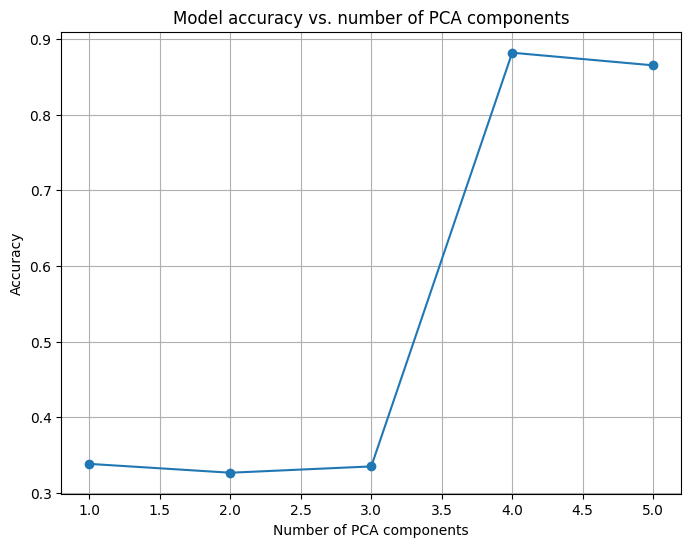

In [11]:
from sklearn.metrics import accuracy_score

# List to store the accuracies
accuracies = []

# Loop over the number of components
for i in range(1, 6):
    # Create and fit the pipeline
    pipe_rf = Pipeline([('pca', PCA(n_components=i)), ('clf', RandomForestClassifier())])
    pipe_rf.fit(X_train, y_train)
    
    # Predict the test data and calculate the accuracy
    y_pred = pipe_rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy
    accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Model accuracy vs. number of PCA components')
plt.xlabel('Number of PCA components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [12]:
from sklearn.neural_network import MLPClassifier

# Define the pipeline
pipe_nn = Pipeline([('pca', PCA(n_components=4)), ('clf', MLPClassifier(hidden_layer_sizes=(200,),max_iter=1000))])

# Fit the pipeline on the training data
pipe_nn.fit(X_train, y_train)

# Predict the test data
y_pred = pipe_nn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9083333333333333


/home/user/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
import numpy as np

# Define the pipeline
pipe_nn = Pipeline([('pca', PCA()), ('clf', MLPClassifier(max_iter=1000))])

# Define the grid of parameters to search over
param_grid = {
    'pca__n_components': [2, 3, 4],
    'clf__hidden_layer_sizes': [(50,), (100,), (200,)],
    'clf__activation': ['relu', 'tanh'],
    'clf__learning_rate_init': [0.001, 0.01, 0.1],
    'clf__max_iter': [100,300,500,750,1000]
}

# Create the grid search object
grid = GridSearchCV(pipe_nn, param_grid, cv=5)

# Fit the grid search object on the training data
grid.fit(X_train, y_train)

print(grid.best_estimator_)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5)

# Calculate mean and standard deviation for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

/home/user/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/user/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/user/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/user/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/user/.local/lib/python3.8/site-packages/sklearn/neural

In [ ]:
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]